In [ ]:
# Quality Control – Binomial Probability Analysis

import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom


# 1. Define Custom Functions
def factorial(n):
    """Return factorial of n (n!)."""
    if n == 0 or n == 1:
        return 1
    else:
        return n * factorial(n - 1)


def nCr(n, r):
    """Compute n choose r."""
    return factorial(n) / (factorial(r) * factorial(n - r))

def binomial_pmf(n, k, p):
    """Return P(X = k) for Binomial(n, p)."""
    return nCr(n, k) * (p ** k) * ((1 - p) ** (n - k))

In [ ]:
# 2. Compute Key Probabilities (Manual + Library)

n = 20         # sample size
p = 0.05       # probability of defect

# Manual calculations using custom functions
P_X_eq_2_manual = binomial_pmf(n, 2, p)
P_X_le_2_manual = sum(binomial_pmf(n, k, p) for k in range(0, 3))

# Using scipy.stats.binom
P_X_eq_2_lib = binom.pmf(2, n, p)
P_X_le_2_lib = binom.cdf(2, n, p)

# Find smallest x where P(X ≤ x) = 0.95
x_95 = binom.ppf(0.95, n, p)

# Generate 20 random samples (number of defectives found)
random_samples = binom.rvs(n, p, size=20)
print("---- Probability Calculations ----")
print(f"P(X = 2) [Manual]  = {P_X_eq_2_manual:.5f}")
print(f"P(X = 2) [Library] = {P_X_eq_2_lib:.5f}")
print(f"P(X ≤ 2) [Manual]  = {P_X_le_2_manual:.5f}")
print(f"P(X ≤ 2) [Library] = {P_X_le_2_lib:.5f}")
print(f"Smallest x where P(X ≤ x) = 0.95 → x = {int(x_95)}")
print(f"\nRandom Samples (20 inspections):\n{random_samples}")

---- Probability Calculations ----
P(X = 2) [Manual]  = 0.18868
P(X = 2) [Library] = 0.18868
P(X ≤ 2) [Manual]  = 0.92452
P(X ≤ 2) [Library] = 0.92452
Smallest x where P(X ≤ x) = 0.95 → x = 3

Random Samples (20 inspections):
[1 2 1 2 1 2 1 1 0 1 0 0 0 0 1 1 1 0 1 2]


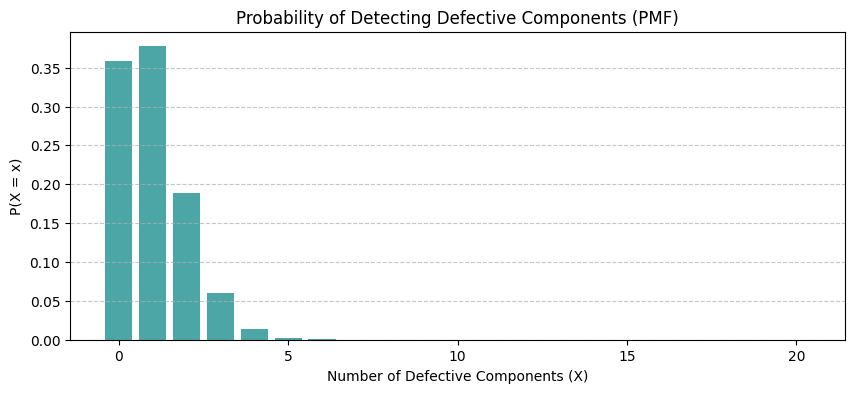

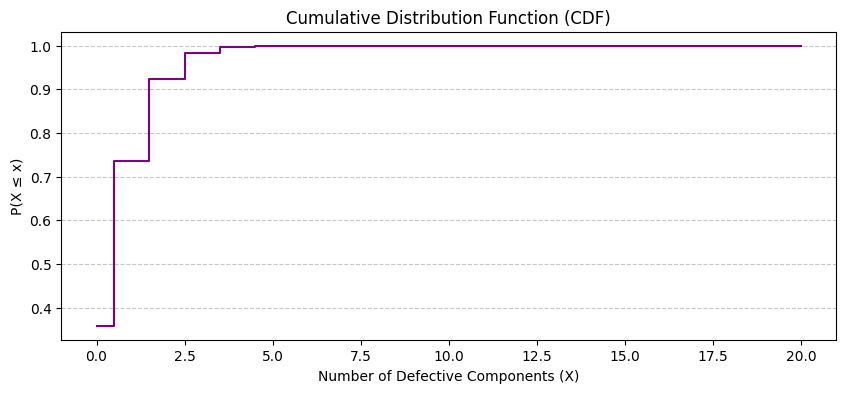

In [ ]:
# 3. Visualize the Results
x = np.arange(0, n + 1)
pmf_values = binom.pmf(x, n, p)
cdf_values = binom.cdf(x, n, p)

# Plot PMF
plt.figure(figsize=(10, 4))
plt.bar(x, pmf_values, color='teal', alpha=0.7)
plt.title("Probability of Detecting Defective Components (PMF)")
plt.xlabel("Number of Defective Components (X)")
plt.ylabel("P(X = x)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot CDF
plt.figure(figsize=(10, 4))
plt.step(x, cdf_values, where='mid', color='purple')
plt.title("Cumulative Distribution Function (CDF)")
plt.xlabel("Number of Defective Components (X)")
plt.ylabel("P(X ≤ x)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# 4. Interpretation

# Probability of finding more than 3 defective components
P_more_than_3 = 1 - binom.cdf(3, n, p)

print("\n---- Interpretation ----")
print(f"Probability of finding more than 3 defective components: {P_more_than_3:.5f}")
print("\nIf defect probability increases to 0.2:")
print("→ The distribution shifts to the right (mean increases).")
print("→ It becomes more spread out and less skewed, with higher chance of multiple defectives.")
print("→ The PMF peak moves to higher X values (more defectives per batch).")


---- Interpretation ----
Probability of finding more than 3 defective components: 0.01590

If defect probability increases to 0.2:
→ The distribution shifts to the right (mean increases).
→ It becomes more spread out and less skewed, with higher chance of multiple defectives.
→ The PMF peak moves to higher X values (more defectives per batch).
